Tasks
* implement MLP, 3 hidden layers ,  200 hidden units per layer, ReLu non-linearities with batch normalization
* MLP + random signed vector
* MLP + adversarial training (adversarial samples generated per iteration)
* MC dropout (dropout after each non-linearity, dropout rate 0.1)

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

Loading notMNIST data

In [15]:
# https://github.com/shnayder/deep-learning-workshop/blob/master/02-notmnist-mlp-keras.ipynb

from __future__ import print_function
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import os

def load_data(path='notMNIST.pickle'):
    """
    Read a pre-prepared pickled dataset of the notmnist dataset
    (http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html).
    Args:
        path: Where to find the file, relative to .
    Returns: tuple of three pairs of np arrays
        (train_x, train_y), (valid_x, valid_y), (test_x, test_y)
        The x arrays have shape (-1,28,28), and x values are floating point, normalized to have approximately zero mean
        and standard deviation ~0.5.
        The y arrays are single dimensional categorical (not 1-hot).
    """
    with open(os.path.expanduser(path), 'rb') as f:
        save = pickle.load(f, encoding='latin1')
        train_x = save['train_dataset']
        train_y = save['train_labels']
        valid_x = save['valid_dataset']
        valid_y = save['valid_labels']
        test_x = save['test_dataset']
        test_y = save['test_labels']
        del save  # hint to help gc free up memory

        return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)


In [17]:
(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = load_data('data/notMNIST.pickle')
len(x_train), len(x_valid), len(x_test)

(20000, 1000, 1000)

AttributeError: module 'matplotlib.pyplot' has no attribute 'despine'

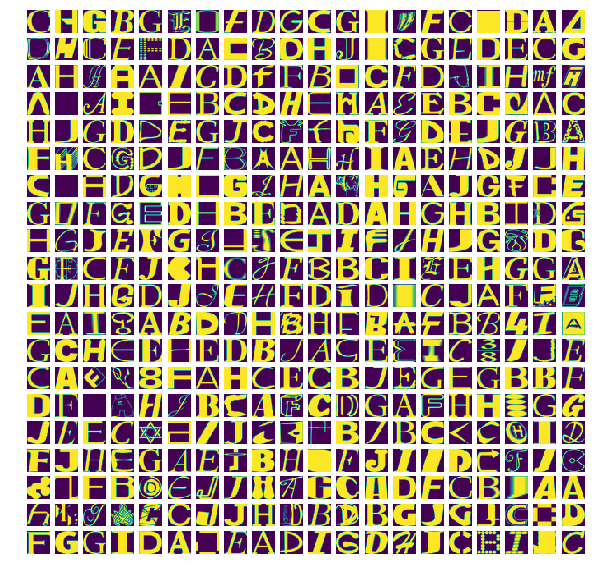

In [23]:
fig, axs = plt.subplots(20,20, sharex=True, sharey=True, figsize=(10,10))
for i, idx in enumerate(np.random.choice(len(x_train), 400, replace=False)):
    img = x_train[idx]
    ax = axs[i//20, i%20]
    ax.imshow(img)
    ax.axis('off')
plt.despine(fig, left=True, bottom=True)

In [27]:
# Reshape inputs to flat vectors, convert labels to one-hot.
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

20000 train samples
1000 valid samples
1000 test samples


In [28]:
batch_size = 128
nb_classes = 10
nb_epoch = 10

In [29]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [33]:
model = Sequential()
model.add(Dense(200, input_shape=(784,), name="hidden1"))
model.add(Dense(200, input_shape=(784,), name="hidden2"))
model.add(Dense(200, input_shape=(784,), name="hidden3"))
model.add(Activation('relu', name="ReLU"))
model.add(Dense(10, name="output"))
model.add(Activation('softmax', name="softmax"))

model.summary()

# for multi-class classification, we'll use cross-entropy as the loss.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              # Here, we tell Keras that we care about accuracy in addition to loss
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 200)               157000    
_________________________________________________________________
hidden2 (Dense)              (None, 200)               40200     
_________________________________________________________________
hidden3 (Dense)              (None, 200)               40200     
_________________________________________________________________
ReLU (Activation)            (None, 200)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2010      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 239,410
Trainable params: 239,410
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 20000 samples, validate on 1000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 53us/step - loss: 0.6797 - acc: 0.7983 - val_loss: 0.6832 - val_acc: 0.8040
Epoch 2/10
20000/20000 [==============================] - 1s 34us/step - loss: 0.5272 - acc: 0.8416 - val_loss: 0.5726 - val_acc: 0.8440
Epoch 3/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.4620 - acc: 0.8611 - val_loss: 0.5640 - val_acc: 0.8350
Epoch 4/10
20000/20000 [==============================] - 1s 34us/step - loss: 0.4174 - acc: 0.8707 - val_loss: 0.6315 - val_acc: 0.8230
Epoch 5/10
20000/20000 [==============================] - 1s 34us/step - loss: 0.3758 - acc: 0.8821 - val_loss: 0.5878 - val_acc: 0.8420
Epoch 6/10
20000/20000 [==============================] - 1s 31us/step - loss: 0.3431 - acc: 0.8930 - val_loss: 0.6510 - val_acc: 0.8250
Epoch 7/10
20000/20000 [==============================] - 1s 35us/step - loss: 0.3134 - acc: 0.9028 - val_loss: 0.6402 - val_acc:

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.413377248570323
Test accuracy: 0.898


MNIST

In [1]:
# load MNIST

## Loading MNIST dataset from keras
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline


def load_mnist(path='MNIST.pickle'):
    with open(os.path.expanduser(path), 'rb') as f:
        train, val, test = pickle.load(f, encoding='latin1')
#         del save  # hint to help gc free up memory

        return train, val, test



train, val, test = load_mnist("data/mnist.pkl")
X_train, Y_train, X_val, Y_val, X_test, Y_test = train[0], train[1], val[0], val[1], test[0], test[1]

Using TensorFlow backend.


In [3]:
## Changing dimension of input images from N*28*28 to  N*784
# X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
# X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
# print('Train dimension:');print(X_train.shape)
# print('Test dimension:');print(X_test.shape)
## Changing labels to one-hot encoded vector
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)
print('Train labels dimension:');print(Y_train.shape)
print('Test labels dimension:');print(Y_test.shape)

Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [7]:
# might be better to run MLP manually instead of keras, 
# as for adversarial training we'll need to modify training set per iteration

In [50]:
# https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809

print("Without Dropout")

import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

## Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = Y_train.shape[1]
num_features = X_train.shape[1]
num_output = Y_train.shape[1]
num_layers_0 = 200
num_layers_1 = 200
num_layers_2 = 200
starter_learning_rate = 0.001
regularizer_rate = 0.1

# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_Y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')



## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
bias_3 = tf.Variable(tf.random_normal([num_output]))

# for dropout layer
# keep_prob = tf.placeholder(tf.float32)
# # Initializing weigths and biases -- with dropout
# hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
# hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
# hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
# hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1_1,weights_2)+bias_2)
# hidden_output_2_2 = tf.nn.dropout(hidden_output_2, keep_prob)
# predicted_y = tf.sigmoid(tf.matmul(hidden_output_2_2,weights_3) + bias_3)

# ## Initializing weigths and biases -- withOUT dropout
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2)+bias_2)
predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2,weights_3) + bias_3)

## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)) + tf.reduce_sum(tf.square(bias_2)))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,
                                                                         bias_0,bias_1,bias_2,bias_3])

## Metrics definition
correct_prediction = tf.equal(tf.argmax(Y_train,1), tf.argmax(predicted_Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.1
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
#         s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
#                           input_Y: Y_train[arr[index:index+batch_size]],
#                         keep_prob:dropout_prob})
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_Y: Y_train[arr[index:index+batch_size]]})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_Y: Y_train}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_Y: Y_train}))
    
#     training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
#                                                          input_Y: Y_train,keep_prob:1}))
#     training_loss.append(s.run(loss, {input_X: X_train, 
#                                       input_Y: Y_train,keep_prob:1}))
    
    ## Evaluation of model
#     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
#                             s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))
    testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
                            s.run(predicted_Y, {input_X: X_test}).argmax(1)))
    print("Epoch:{0} | Train loss: {1:.2f} | Train acc: {2:.3f} | Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Without Dropout


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 35.39 | Train acc: 0.939 | Test acc:0.937
Epoch:1 | Train loss: 20.34 | Train acc: 0.957 | Test acc:0.955
Epoch:2 | Train loss: 11.90 | Train acc: 0.968 | Test acc:0.962
Epoch:3 | Train loss: 7.14 | Train acc: 0.976 | Test acc:0.967
Epoch:4 | Train loss: 4.48 | Train acc: 0.979 | Test acc:0.970
Epoch:5 | Train loss: 3.02 | Train acc: 0.982 | Test acc:0.973
Epoch:6 | Train loss: 2.24 | Train acc: 0.984 | Test acc:0.974
Epoch:7 | Train loss: 1.84 | Train acc: 0.986 | Test acc:0.976
Epoch:8 | Train loss: 1.63 | Train acc: 0.988 | Test acc:0.975
Epoch:9 | Train loss: 1.54 | Train acc: 0.988 | Test acc:0.974
Epoch:10 | Train loss: 1.50 | Train acc: 0.986 | Test acc:0.972
Epoch:11 | Train loss: 1.48 | Train acc: 0.988 | Test acc:0.973
Epoch:12 | Train loss: 1.47 | Train acc: 0.992 | Test acc:0.977
Epoch:13 | Train loss: 1.47 | Train acc: 0.992 | Test acc:0.977


In [49]:
# # https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809

# print("With Dropout")

# import tensorflow as tf
# from sklearn.metrics import roc_auc_score, accuracy_score
# s = tf.InteractiveSession()

# ## Defining various initialization parameters for 784-512-256-10 MLP model
# num_classes = Y_train.shape[1]
# num_features = X_train.shape[1]
# num_output = Y_train.shape[1]
# num_layers_0 = 200
# num_layers_1 = 200
# num_layers_2 = 200
# starter_learning_rate = 0.001
# regularizer_rate = 0.1

# # Placeholders for the input data
# input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
# input_Y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')



# ## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
# # weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
# # bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
# # weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
# # bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
# # weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
# # bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
# # weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
# # bias_3 = tf.Variable(tf.random_normal([num_output]))

# # for dropout layer
# keep_prob = tf.placeholder(tf.float32)
# # Initializing weigths and biases -- with dropout
# hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
# hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
# hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
# hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1_1,weights_2)+bias_2)
# hidden_output_2_2 = tf.nn.dropout(hidden_output_2, keep_prob)
# predicted_y = tf.sigmoid(tf.matmul(hidden_output_2_2,weights_3) + bias_3)

# # ## Initializing weigths and biases -- withOUT dropout
# # hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# # hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
# # hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2)+bias_2)
# # predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2,weights_3) + bias_3)

# ## Defining the loss function
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
#         + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)) + tf.reduce_sum(tf.square(bias_2)))

# ## Variable learning rate
# learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
# ## Adam optimzer for finding the right weight
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,
#                                                                          bias_0,bias_1,bias_2,bias_3])

# ## Metrics definition
# correct_prediction = tf.equal(tf.argmax(Y_train,1), tf.argmax(predicted_Y,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# ## Training parameters
# batch_size = 128
# epochs=14
# dropout_prob = 0.1
# training_accuracy = []
# training_loss = []
# testing_accuracy = []
# s.run(tf.global_variables_initializer())
# for epoch in range(epochs):    
#     arr = np.arange(X_train.shape[0])
#     np.random.shuffle(arr)
#     for index in range(0,X_train.shape[0],batch_size):
#         s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
#                           input_Y: Y_train[arr[index:index+batch_size]],
#                         keep_prob:dropout_prob})
# #         s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
# #                           input_Y: Y_train[arr[index:index+batch_size]]})
# #     training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
# #                                                          input_Y: Y_train}))
# #     training_loss.append(s.run(loss, {input_X: X_train, 
# #                                       input_Y: Y_train}))
    
#     training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
#                                                          input_Y: Y_train,keep_prob:1}))
#     training_loss.append(s.run(loss, {input_X: X_train, 
#                                       input_Y: Y_train,keep_prob:1}))
    
#     ## Evaluation of model
#     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
#                             s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))
# #     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
# #                             s.run(predicted_Y, {input_X: X_test}).argmax(1)))
#     print("Epoch:{0} | Train loss: {1:.2f} | Train acc: {2:.3f} | Test acc:{3:.3f}".format(epoch,
#                                                                     training_loss[epoch],
#                                                                     training_accuracy[epoch],
#                                                                    testing_accuracy[epoch]))

In [44]:
# https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809

print("Without Dropout, With Batch Normalization")

import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

from tensorflow.contrib.layers.python.layers import batch_norm as batch_norm
# Batch normalization implementation
# from https://github.com/tensorflow/tensorflow/issues/1122
def batch_norm_layer(inputT, is_training=True, scope=None):
    # Note: is_training is tf.placeholder(tf.bool) type
    return tf.cond(is_training,
                    lambda: batch_norm(inputT, is_training=True,
                    center=True, scale=True, activation_fn=tf.nn.relu, decay=0.9, scope=scope),
                    lambda: batch_norm(inputT, is_training=False,
                    center=True, scale=True, activation_fn=tf.nn.relu, decay=0.9,
                    scope=scope, reuse = True))

## Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = Y_train.shape[1]
num_features = X_train.shape[1]
num_output = Y_train.shape[1]
num_layers_0 = 200
num_layers_1 = 200
num_layers_2 = 200
starter_learning_rate = 0.001
regularizer_rate = 0.1

# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_Y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')



## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
bias_3 = tf.Variable(tf.random_normal([num_output]))

# for dropout layer
# keep_prob = tf.placeholder(tf.float32)
# # Initializing weigths and biases -- with dropout
# hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
# hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
# hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
# hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1_1,weights_2)+bias_2)
# hidden_output_2_2 = tf.nn.dropout(hidden_output_2, keep_prob)
# predicted_y = tf.sigmoid(tf.matmul(hidden_output_2_2,weights_3) + bias_3)

# ## Initializing weigths and biases -- withOUT dropout
# hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
# hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2)+bias_2)

# hidden_output_0 = tf.nn.relu(tf.nn.batch_normalization(tf.matmul(input_X,weights_0)+bias_0), tf.nn.moments(tf.matmul(input_X,weights_0)+bias_0,[0])[0], tf.nn.moments(tf.matmul(input_X,weights_0)+bias_0,[0])[1], tf.Variable(tf.zeros([X_train.shape[0]])), tf.Variable(tf.ones([X_train.shape[0]])), 1e-3)
# hidden_output_1 = tf.nn.relu(tf.nn.batch_normalization(tf.matmul(hidden_output_0,weights_1)+bias_1), tf.nn.moments(tf.matmul(hidden_output_0,weights_1)+bias_1,[0])[0], tf.nn.moments(tf.matmul(hidden_output_0,weights_1)+bias_1,[0])[1], tf.Variable(tf.zeros([X_train.shape[0]])), tf.Variable(tf.ones([X_train.shape[0]])), 1e-3)
# hidden_output_2 = tf.nn.relu(tf.nn.batch_normalization(tf.matmul(hidden_output_1,weights_2)+bias_2), tf.nn.moments(tf.matmul(hidden_output_1,weights_2)+bias_2,[0])[0], tf.nn.moments(tf.matmul(hidden_output_1,weights_2)+bias_2,[0])[1], tf.Variable(tf.zeros([X_train.shape[0]])), tf.Variable(tf.ones([X_train.shape[0]])), 1e-3)

h0 = tf.matmul(input_X,weights_0)+bias_0
batch_mean0, batch_var0 = tf.nn.moments(h0,[0])
hidden_output_0 = tf.nn.relu(tf.nn.batch_normalization(h0, batch_mean0, batch_var0, tf.Variable(tf.zeros([200])), tf.Variable(tf.ones([200])), 1e-3))
h1 = tf.matmul(hidden_output_0,weights_1)+bias_1
batch_mean1, batch_var1 = tf.nn.moments(h1,[0])
hidden_output_1 = tf.nn.relu(tf.nn.batch_normalization(h1, batch_mean1, batch_var1, tf.Variable(tf.zeros([200])), tf.Variable(tf.ones([200])), 1e-3))
h2 = tf.matmul(hidden_output_1,weights_2)+bias_2
batch_mean2, batch_var2 = tf.nn.moments(h2,[0])
hidden_output_2 = tf.nn.relu(tf.nn.batch_normalization(h2, batch_mean2, batch_var2, tf.Variable(tf.zeros([200])), tf.Variable(tf.ones([200])), 1e-3))

# is_training = tf.placeholder(tf.bool, name='MODE')
# hidden_output_0 = tf.nn.relu(batch_norm_layer(tf.matmul(input_X,weights_0)+bias_0),is_training=is_training)
# hidden_output_1 = tf.nn.relu(batch_norm_layer(tf.matmul(hidden_output_0,weights_1)+bias_1),is_training=is_training)
# hidden_output_2 = tf.nn.relu(batch_norm_layer(tf.matmul(hidden_output_1,weights_2)+bias_2),is_training=is_training)

predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2,weights_3) + bias_3)

## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)) + tf.reduce_sum(tf.square(bias_2)))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,
                                                                         bias_0,bias_1,bias_2,bias_3])

## Metrics definition
correct_prediction = tf.equal(tf.argmax(Y_train,1), tf.argmax(predicted_Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.1
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
#         s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
#                           input_Y: Y_train[arr[index:index+batch_size]],
#                         keep_prob:dropout_prob})
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],input_Y: Y_train[arr[index:index+batch_size]]})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, input_Y: Y_train}))
    training_loss.append(s.run(loss, {input_X: X_train, input_Y: Y_train}))
    
#     training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
#                                                          input_Y: Y_train,keep_prob:1}))
#     training_loss.append(s.run(loss, {input_X: X_train, 
#                                       input_Y: Y_train,keep_prob:1}))
    
    ## Evaluation of model
#     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
#                             s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))
    testing_accuracy.append(accuracy_score(Y_test.argmax(1), s.run(predicted_Y, {input_X: X_test}).argmax(1)))
    print("Epoch:{0} | Train loss: {1:.2f} | Train acc: {2:.3f} | Test acc:{3:.3f}".format(epoch,training_loss[epoch],training_accuracy[epoch],testing_accuracy[epoch]))

Without Dropout, With Batch Normalization


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 37.75 | Train acc: 0.973 | Test acc:0.966
Epoch:1 | Train loss: 21.91 | Train acc: 0.984 | Test acc:0.973
Epoch:2 | Train loss: 13.00 | Train acc: 0.988 | Test acc:0.976
Epoch:3 | Train loss: 7.94 | Train acc: 0.992 | Test acc:0.978
Epoch:4 | Train loss: 5.07 | Train acc: 0.990 | Test acc:0.977
Epoch:5 | Train loss: 3.44 | Train acc: 0.994 | Test acc:0.980
Epoch:6 | Train loss: 2.53 | Train acc: 0.995 | Test acc:0.981
Epoch:7 | Train loss: 2.02 | Train acc: 0.996 | Test acc:0.981
Epoch:8 | Train loss: 1.74 | Train acc: 0.996 | Test acc:0.982
Epoch:9 | Train loss: 1.60 | Train acc: 0.997 | Test acc:0.982
Epoch:10 | Train loss: 1.52 | Train acc: 0.996 | Test acc:0.981
Epoch:11 | Train loss: 1.49 | Train acc: 0.996 | Test acc:0.980
Epoch:12 | Train loss: 1.47 | Train acc: 0.997 | Test acc:0.982
Epoch:13 | Train loss: 1.47 | Train acc: 0.997 | Test acc:0.981


Restart kernel / clear session to run this model

In [8]:
# https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809

print("With Dropout & Batch Normalization")

import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score

from tensorflow.contrib.layers.python.layers import batch_norm as batch_norm
# Batch normalization implementation
# from https://github.com/tensorflow/tensorflow/issues/1122
def batch_norm_layer(inputT, is_training=True, scope=None):
    # Note: is_training is tf.placeholder(tf.bool) type
    return tf.cond(is_training,
                    lambda: batch_norm(inputT, is_training=True,
                    center=True, scale=True, activation_fn=tf.nn.relu, decay=0.9, scope=scope),
                    lambda: batch_norm(inputT, is_training=False,
                    center=True, scale=True, activation_fn=tf.nn.relu, decay=0.9,
                    scope=scope, reuse = True))


s = tf.InteractiveSession()

## Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = Y_train.shape[1]
num_features = X_train.shape[1]
num_output = Y_train.shape[1]
num_layers_0 = 200
num_layers_1 = 200
num_layers_2 = 200
starter_learning_rate = 0.001
regularizer_rate = 0.1

# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_Y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')



## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
bias_3 = tf.Variable(tf.random_normal([num_output]))

# for dropout layer
keep_prob = tf.placeholder(tf.float32)
# Initializing weigths and biases -- with dropout
h0 = tf.matmul(input_X,weights_0)+bias_0
batch_mean0, batch_var0 = tf.nn.moments(h0,[0])
hidden_output_0 = tf.nn.relu(tf.nn.batch_normalization(h0, batch_mean0, batch_var0, tf.Variable(tf.zeros([200])), tf.Variable(tf.ones([200])), 1e-3))
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
h1 = tf.matmul(hidden_output_0,weights_1)+bias_1
batch_mean1, batch_var1 = tf.nn.moments(h1,[0])
hidden_output_1 = tf.nn.relu(tf.nn.batch_normalization(h1, batch_mean1, batch_var1, tf.Variable(tf.zeros([200])), tf.Variable(tf.ones([200])), 1e-3))
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
h2 = tf.matmul(hidden_output_1,weights_2)+bias_2
batch_mean2, batch_var2 = tf.nn.moments(h2,[0])
hidden_output_2 = tf.nn.relu(tf.nn.batch_normalization(h2, batch_mean2, batch_var2, tf.Variable(tf.zeros([200])), tf.Variable(tf.ones([200])), 1e-3))
hidden_output_2_2 = tf.nn.dropout(hidden_output_2, keep_prob)
predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2_2,weights_3) + bias_3)



# ## Initializing weigths and biases -- withOUT dropout
# hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
# hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2)+bias_2)
# predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2,weights_3) + bias_3)

## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)) + tf.reduce_sum(tf.square(bias_2)))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,
                                                                         bias_0,bias_1,bias_2,bias_3])

## Metrics definition
correct_prediction = tf.equal(tf.argmax(Y_train,1), tf.argmax(predicted_Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.1
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_Y: Y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_Y: Y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_Y: Y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
                            s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))
#     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
#                             s.run(predicted_Y, {input_X: X_test}).argmax(1)))
    print("Epoch:{0} | Train loss: {1:.2f} | Train acc: {2:.3f} | Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))
    
# https://r2rt.com/implementing-batch-normalization-in-tensorflow.html

With Dropout & Batch Normalization


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 33.97 | Train acc: 0.948 | Test acc:0.948
Epoch:1 | Train loss: 19.48 | Train acc: 0.965 | Test acc:0.963
Epoch:2 | Train loss: 11.40 | Train acc: 0.974 | Test acc:0.969
Epoch:3 | Train loss: 6.86 | Train acc: 0.979 | Test acc:0.971
Epoch:4 | Train loss: 4.32 | Train acc: 0.983 | Test acc:0.973
Epoch:5 | Train loss: 2.93 | Train acc: 0.984 | Test acc:0.976
Epoch:6 | Train loss: 2.19 | Train acc: 0.986 | Test acc:0.976
Epoch:7 | Train loss: 1.81 | Train acc: 0.988 | Test acc:0.980
Epoch:8 | Train loss: 1.62 | Train acc: 0.988 | Test acc:0.976
Epoch:9 | Train loss: 1.53 | Train acc: 0.989 | Test acc:0.978
Epoch:10 | Train loss: 1.49 | Train acc: 0.990 | Test acc:0.978
Epoch:11 | Train loss: 1.48 | Train acc: 0.990 | Test acc:0.978
Epoch:12 | Train loss: 1.47 | Train acc: 0.992 | Test acc:0.980
Epoch:13 | Train loss: 1.47 | Train acc: 0.992 | Test acc:0.980


MCDropout just looks like a vanilla network with Dropouts after every layer; original implementation is using LeNet, shall I use MLP as the baseline?

Random signed vector addition - steps
1. generate list of random values (depending on shape)
2. use matrix addition tf.add to sum up two lists, i.e. apply a random value to each value in the list
3. Train on the randomized set, evaluate on CLEAN set


[random baseline clarification: ](https://arxiv.org/pdf/1605.07725.pdf)
A common misconception is that adversarial training is equivalent to training on noisy examples.
Noise is actually a far weaker regularizer than adversarial perturbations because, in high dimensional
input spaces, an average noise vector is approximately orthogonal to the cost gradient. Adversarial
perturbations are explicitly chosen to consistently increase the cost. To demonstrate the superiority
of adversarial training over the addition of noise, we include control experiments which replaced
adversarial perturbations with random perturbations from a multivariate Gaussian with scaled norm,
on each embedding in the sequence. In Table 2, ‘Random perturbation with labeled examples’ is the
method in which we replace radv with random perturbations, and ‘Random perturbation with labeled
and unlabeled examples’ is the method in which we replace rv-adv with random perturbations. Every
adversarial training method outperformed every random perturbat

Adjsutment to pipeline:
1. Build the adversarial training pipeline, where we select samples of inputs to apply perturbaiton per epoch
2. For each value within the tensor of the input, either (1) apply random perturbation at similar scale as AT, or (2) apply FGSM; retain original label
3. Combine to form a new training df for that iteration; train; test on MNIST; move onto next epoch

In [21]:
# applying an array of random values into the variable set -- for reference

# Initialize session
import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
a = tf.add([1,2,1,2,1,2,1,2,1,2,1,2],[i*2 for i in [1,2,1,2,1,2,1,2,1,2,1,2]])

# Add print operation
a = tf.Print(a, [a], message="This is a: ")

# Add more elements of the graph using a
# b = tf.add(a, a)

a.eval()

array([3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6], dtype=int32)

In [ ]:
# test applying perturbations into a sample of inputs

In [35]:
# https://github.com/sarathknv/adversarial-examples-pytorch/blob/master/random_perturbations/explore_space.py

def random_vector_surface(shape=(32, 32, 3)):
    # generates a random vector on the surface of hypersphere
    mat = np.random.normal(size=shape)
    norm = np.linalg.norm(mat)
    return mat/norm

def random_vector_volume(shape=(32, 32, 3)):
    # generates a random vector in the volume of unit hypersphere
    d = np.random.rand() ** (1 / np.prod(shape))

    return random_vector_surface() * d

In [64]:
prop_random = 0.2 # what proportion of the training set do you want to apply perturbations to (!= sampling!!!)
random_vector_surface()

vec1 = random_vector_surface(shape=(int(X_train.shape[0]*prop_random), X_train.shape[1]))
vec2 = random_vector_volume(shape=(int(X_train.shape[0]*prop_random), X_train.shape[1]))
pert = np.zeros((int(X_train.shape[0]*prop_random), X_train.shape[1]), dtype=np.float32)

# pert = (eps/255.0) * np.sign(vec1) + (rad/255.0) * vec2 # use of epsilon=16 for reference


# Might not be wise to shuffle the dataset, given that we kept X and Y separate -- let's just generate random index to start from
import random
# last_index_to_sample_from = int(X_train.shape[0] - X_train.shape[0]*prop_random)
# start_index = random.randint(0,last_index_to_sample_from)
# end_index = start_index + int(X_train.shape[0]*prop_random)
# print("Sample index range: ", (start_index, end_index))

ind = np.arange(int(X_train.shape[0]))
np.random.shuffle(ind)#[0:int(X_train.shape[0]*prop_random)]
ind = ind[0:int(X_train.shape[0]*prop_random)]

# sample from training set, matrix addition
# sample_X_train = X_train[start_index,end_index] # X_train[[start_index,end_index]] ; this would let us take specific indices, so we can randomize the order, ensure each iteration is taking precisely unique samples
# sample_Y_train = Y_train[start_index,end_index]

sample_X_train = X_train[[ind]] # X_train[[start_index,end_index]] ; this would let us take specific indices, so we can randomize the order, ensure each iteration is taking precisely unique samples
sample_Y_train = Y_train[[ind]]


Sample index range:  (27369, 37369)


In [94]:
import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
random_perturbed_X_train = tf.add(sample_X_train,vec1)
# warning: no perturbation for labels, ground truth

# Add print operation
random_perturbed_X_train_print = tf.Print(random_perturbed_X_train, [random_perturbed_X_train], message="This is a: ")

# Add more elements of the graph using a
# b = tf.add(a, a)

random_perturbed_X_train_array = random_perturbed_X_train_print.eval().copy()


In [103]:
# combine two arrays into master array, combine two label arrays into master array

random_combined_X_train = np.array([list(X_train)+list(random_perturbed_X_train_array)][0])
random_combined_Y_train = np.array([list(Y_train)+list(sample_Y_train)][0])
print("New training set shape (X,Y): ", (random_combined_X_train.shape, random_combined_Y_train.shape))

New training set shape (X,Y):  ((60000, 784), (60000, 10))


In [4]:
def random_vector_surface(shape=(32, 32, 3)):
    # generates a random vector on the surface of hypersphere
    mat = np.random.normal(size=shape)
    norm = np.linalg.norm(mat)
    return mat/norm

def random_vector_volume(shape=(32, 32, 3)):
    # generates a random vector in the volume of unit hypersphere
    d = np.random.rand() ** (1 / np.prod(shape))

    return random_vector_surface() * d

print("Without Dropout, MLP with random perturbations")

prop_random = 0.2 # what proportion of the training set do you want to apply perturbations to (!= sampling!!!)
# random_vector_surface()

vec1 = random_vector_surface(shape=(int(X_train.shape[0]*prop_random), X_train.shape[1]))
vec2 = random_vector_volume(shape=(int(X_train.shape[0]*prop_random), X_train.shape[1]))
pert = np.zeros((int(X_train.shape[0]*prop_random), X_train.shape[1]), dtype=np.float32)

# pert = (eps/255.0) * np.sign(vec1) + (rad/255.0) * vec2 # use of epsilon=16 for reference


# Might not be wise to shuffle the dataset, given that we kept X and Y separate -- let's just generate random index to start from
import random
# last_index_to_sample_from = int(X_train.shape[0] - X_train.shape[0]*prop_random)
# start_index = random.randint(0,last_index_to_sample_from)
# end_index = start_index + int(X_train.shape[0]*prop_random)
# print("Sample index range: ", (start_index, end_index))

ind = np.arange(int(X_train.shape[0]))
np.random.shuffle(ind)#[0:int(X_train.shape[0]*prop_random)]
ind = ind[0:int(X_train.shape[0]*prop_random)]

# sample from training set, matrix addition
# sample_X_train = X_train[start_index,end_index] # X_train[[start_index,end_index]] ; this would let us take specific indices, so we can randomize the order, ensure each iteration is taking precisely unique samples
# sample_Y_train = Y_train[start_index,end_index]

sample_X_train = X_train[[ind]] # X_train[[start_index,end_index]] ; this would let us take specific indices, so we can randomize the order, ensure each iteration is taking precisely unique samples
sample_Y_train = Y_train[[ind]]

import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
random_perturbed_X_train = tf.add(sample_X_train,vec1)
# warning: no perturbation for labels, ground truth

# Add print operation
random_perturbed_X_train_print = tf.Print(random_perturbed_X_train, [random_perturbed_X_train], message="This is a: ")

# Add more elements of the graph using a
# b = tf.add(a, a)

random_perturbed_X_train_array = random_perturbed_X_train_print.eval().copy()

# combine two arrays into master array, combine two label arrays into master array

random_combined_X_train = np.array([list(X_train)+list(random_perturbed_X_train_array)][0])
random_combined_Y_train = np.array([list(Y_train)+list(sample_Y_train)][0])
print("New training set shape (X,Y): ", (random_combined_X_train.shape, random_combined_Y_train.shape))


import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

## Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = random_combined_Y_train.shape[1]
num_features = random_combined_X_train.shape[1]
num_output = random_combined_Y_train.shape[1]
num_layers_0 = 200
num_layers_1 = 200
num_layers_2 = 200
starter_learning_rate = 0.001
regularizer_rate = 0.1

# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_Y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')



## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
bias_3 = tf.Variable(tf.random_normal([num_output]))

# for dropout layer
# keep_prob = tf.placeholder(tf.float32)
# # Initializing weigths and biases -- with dropout
# hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
# hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)
# hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
# hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)
# hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1_1,weights_2)+bias_2)
# hidden_output_2_2 = tf.nn.dropout(hidden_output_2, keep_prob)
# predicted_y = tf.sigmoid(tf.matmul(hidden_output_2_2,weights_3) + bias_3)

# ## Initializing weigths and biases -- withOUT dropout
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)+bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2)+bias_2)
predicted_Y = tf.sigmoid(tf.matmul(hidden_output_2,weights_3) + bias_3)

## Defining the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_Y,labels=input_Y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)) + tf.reduce_sum(tf.square(bias_2)))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,
                                                                         bias_0,bias_1,bias_2,bias_3])

## Metrics definition
correct_prediction = tf.equal(tf.argmax(random_combined_Y_train,1), tf.argmax(predicted_Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Training parameters
batch_size = 128
epochs=4
dropout_prob = 0.1
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,random_combined_X_train.shape[0],batch_size):
#         s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
#                           input_Y: Y_train[arr[index:index+batch_size]],
#                         keep_prob:dropout_prob})
        s.run(optimizer, {input_X: random_combined_X_train[arr[index:index+batch_size]],
                          input_Y: random_combined_Y_train[arr[index:index+batch_size]]})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:random_combined_X_train, 
                                                         input_Y: random_combined_Y_train}))
    training_loss.append(s.run(loss, {input_X: random_combined_X_train, 
                                      input_Y: random_combined_Y_train}))

#     training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
#                                                          input_Y: Y_train,keep_prob:1}))
#     training_loss.append(s.run(loss, {input_X: X_train, 
#                                       input_Y: Y_train,keep_prob:1}))

    ## Evaluation of model
#     testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
#                             s.run(predicted_Y, {input_X: X_test,keep_prob:1}).argmax(1)))
    testing_accuracy.append(accuracy_score(Y_test.argmax(1), 
                            s.run(predicted_Y, {input_X: X_test}).argmax(1)))
    print("Epoch:{0} | Train loss: {1:.2f} | Train acc: {2:.3f} | Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

# return class probabilities
#     prediction=tf.argmax(predicted_Y,1) # predicted_Y or Y_test ?
#     print("Predictions", prediction.eval(feed_dict={input_X: X_test}, session=s))
#     pred_values = prediction.eval(feed_dict={input_X: X_test}, session=s) # https://github.com/tensorflow/tensorflow/issues/97
#     prediction = tf.nn.softmax(X_test)
prediction = s.run(predicted_Y, {input_X: X_test})

Without Dropout, MLP with random perturbations


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:41: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
W0210 20:30:36.889678 139665225029376 deprecation.py:323] From <ipython-input-4-a9a217f9e7c0>:51: Print (from tensorflow.python.ops.logging_ops) is deprecated and will be removed after 2018-08-20.
Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints

New training set shape (X,Y):  ((60000, 784), (60000, 10))


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 28.43 | Train acc: 0.885 | Test acc:0.884
Epoch:1 | Train loss: 14.54 | Train acc: 0.939 | Test acc:0.936
Epoch:2 | Train loss: 7.76 | Train acc: 0.958 | Test acc:0.948
Epoch:3 | Train loss: 4.41 | Train acc: 0.964 | Test acc:0.956


Ensembling model structure - MLP

In [ ]:
# https://github.com/muupan/deep-ensemble-uncertainty/blob/master/train_ensemble.ipynb

In [ ]:
# def gaussian_loss(y_true, y_pred, sigma):
#     """
#     Util function used to derive gradients w.r.t. to input data (for adversarial examples generation)
#     """
#     return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6

# loss_calc = gaussian_nll(outputs, mu, sigma)
# loss_gradients = tf.gradients(loss_calc, inputs)
# gr_sign = tf.sign(loss_gradients)
# adversarial_input_data = tf.add(inputs, 0.2 * gr_sign)

Next steps:
* How to build the ensembling structure -- and apply MLP, MLP+R, MLP+AT, MLP_Dropout to it
* How to retrieve the metrics needed for plotting chart
* Do validation for notMNIST